In [2]:
from matplotlib import pyplot as plt
from core.utility import get_rgb_image
from core.vit.Patch import Patches
from core.vit.vit_config import image_size
from init_data import load_available_data,normalize_numeric_data
import random
import numpy as np
import tensorflow as tf

In [3]:
print(tf.__version__)

2.9.1


In [4]:
dish, dish_ingredients = load_available_data()

print(dish.info())
print(dish_ingredients.info())

init_data_py :  Total Dishes (5006, 6)
init_data_py :  Total Dish Ingredients (28455, 8)
init_data_py :  Dish Master (5006, 6)
init_data_py :  Dish Ingredients Master (28455, 8)
init_data_py :  Training Dish Ids (2758, 1)
init_data_py :  Test Dish Ids (507, 1)
init_data_py :  Dish Information =  (5006, 6)
init_data_py :  Dish Ingredient Information =  (28455, 8)
init_data_py :  Dish data top rows
           dish_id total_calories  total_mass  total_fat total_carb  \
0  dish_1561662216     300.794281  193.000000  12.387489  28.218290   
1  dish_1562688426     137.569992   88.000000   8.256000   5.190000   
2  dish_1561662054     419.438782  292.000000  23.838249  26.351543   
3  dish_1562008979     382.936646  290.000000  22.224644  10.173570   
4  dish_1560455030      20.590000  103.000000   0.148000   4.625000   

  total_protein  
0     18.633970  
1     10.297000  
2     25.910593  
3     35.345387  
4      0.956000  
init_data_py :  Dish Ingredients data top rows
           dish_id

In [5]:
normalize_numeric_data(dish,dish_ingredients)

In [6]:
SAMPLE_SIZE = 50
experiment_name = 'sample-50-rms'
sample50_data_index = random.sample(list(dish.index),SAMPLE_SIZE)
sample50_data = dish.loc[sample50_data_index]
sample50_data.shape

(50, 12)

In [7]:
sample50_data.head()

,dish_id,image_path,total_calories,total_mass,total_fat,total_carb,total_protein,total_calories_norm,total_mass_norm,total_fat_norm,total_carb_norm,total_protein_norm
1793,dish_1561148481,E://nutrition5k_dataset/imagery/realsense_over...,281.281128,140.0,14.385699,18.905287,18.591501,0.071331,0.045887,0.135276,0.022385,0.126051
2189,dish_1559233627,E://nutrition5k_dataset/imagery/realsense_over...,64.919998,12.0,5.040000,0.168000,4.440000,0.016463,0.003933,0.047394,0.000199,0.030103
2190,dish_1563551105,E://nutrition5k_dataset/imagery/realsense_over...,194.399994,72.0,5.760000,29.016001,6.710400,0.049298,0.023599,0.054164,0.034356,0.045497
1164,dish_1568666089,E://nutrition5k_dataset/imagery/realsense_over...,276.424072,335.0,9.802980,33.010952,16.691326,0.070099,0.109800,0.092183,0.039086,0.113168
3132,dish_1562945803,E://nutrition5k_dataset/imagery/realsense_over...,50.295322,64.0,2.055645,7.613193,1.103000,0.012755,0.020977,0.019330,0.009014,0.007478


In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

In [9]:
sample50_train_gen  = generator.flow_from_dataframe(dataframe=sample50_data,
                              target_size=(256,256),
                              x_col="image_path",
                              class_mode ="raw",
                              directory=None,
                              y_col = "total_calories_norm",
                              batch_size=1,
                              subset="training",
                              seed=123,
                              rescale=1.0/255)
sample50_test_gen  = generator.flow_from_dataframe(dataframe=sample50_data,
                              target_size=(256,256),
                              x_col="image_path",
                              class_mode ="raw",
                              directory=None,
                              batch_size=1,
                              seed=123,
                              y_col = "total_calories_norm",
                              subset="validation",
                              rescale=1.0/255)

Found 40 validated image filenames.
Found 10 validated image filenames.


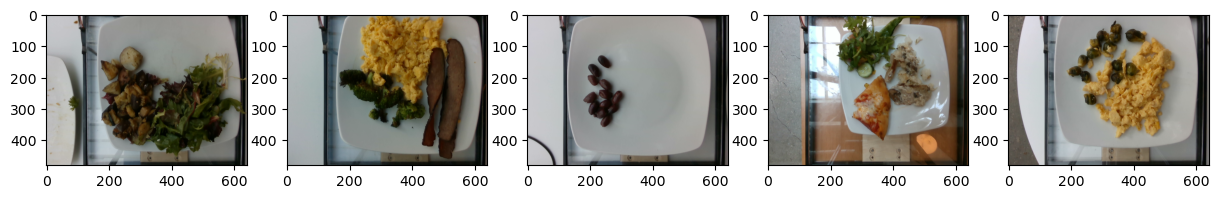

In [10]:
random_ids = random.sample(list(sample50_data.dish_id),5)
tmp = get_rgb_image(random_ids)
i = 0
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
for img_info in tmp :
  ax[i].imshow(img_info["image"])
  i += 1

In [ ]:
patch_size = 16  # Size of the patches to be extracted from the input images
image = next(sample50_train_gen)[0]
image = np.squeeze(image)
plt.figure(figsize=(4, 4))
plt.imshow(image.astype('uint8'))
plt.axis("off")

patches = Patches(patch_size)(tf.convert_to_tensor([image]))
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"{patches.shape[1]} patches per image \n{patches.shape[-1]} elements per patch")


n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")